In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import math 
import seaborn as sns

In [14]:
car_df = pd.read_csv('data/cars.csv')

In [15]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
car_df['car_name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [17]:
car_df.rename(columns={'model':'year'}, inplace=True)

In [18]:
car_df['car_name'][1]

'buick skylark 320'

In [19]:
car_df['make'] = car_df['car_name'].str.split().str[0]
car_df['model'] = car_df['car_name'].str.split().str[1:].str.join(' ')
car_df.drop('car_name', axis=1, inplace=True)

In [20]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford,torino


In [21]:
car_df[car_df['horsepower'] == '?'].count()

mpg             6
cylinders       6
displacement    6
horsepower      6
weight          6
acceleration    6
year            6
origin          6
make            6
model           6
dtype: int64

In [22]:
car_df['horsepower'].replace('?', 0, inplace=True)

In [23]:
car_df['horsepower'] = car_df['horsepower'].astype(float)

In [24]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   make          398 non-null    object 
 9   model         398 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [25]:
car_df["year"]

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: year, Length: 398, dtype: int64

In [26]:
car_df["year groups"] = pd.cut(car_df["year"], [70, 73, 76, 79, 83], include_lowest=True, right=False, labels=["70-72", "73-75", "76-78", "79-82"])



In [27]:
car_df["year groups"].isna().count()

398

In [28]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make,model,year groups
116,16.0,8,400.0,230.0,4278.0,9.5,73,1,pontiac,grand prix,73-75
358,31.6,4,120.0,74.0,2635.0,18.3,81,3,mazda,626,79-82
259,20.8,6,200.0,85.0,3070.0,16.7,78,1,mercury,zephyr,76-78
60,20.0,4,140.0,90.0,2408.0,19.5,72,1,chevrolet,vega,70-72
244,43.1,4,90.0,48.0,1985.0,21.5,78,2,volkswagen,rabbit custom diesel,76-78
166,13.0,8,302.0,129.0,3169.0,12.0,75,1,ford,mustang ii,73-75
103,11.0,8,400.0,150.0,4997.0,14.0,73,1,chevrolet,impala,73-75
291,19.2,8,267.0,125.0,3605.0,15.0,79,1,chevrolet,malibu classic (sw),79-82
179,22.0,4,121.0,98.0,2945.0,14.5,75,2,volvo,244dl,73-75
390,32.0,4,144.0,96.0,2665.0,13.9,82,3,toyota,celica gt,79-82


In [29]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


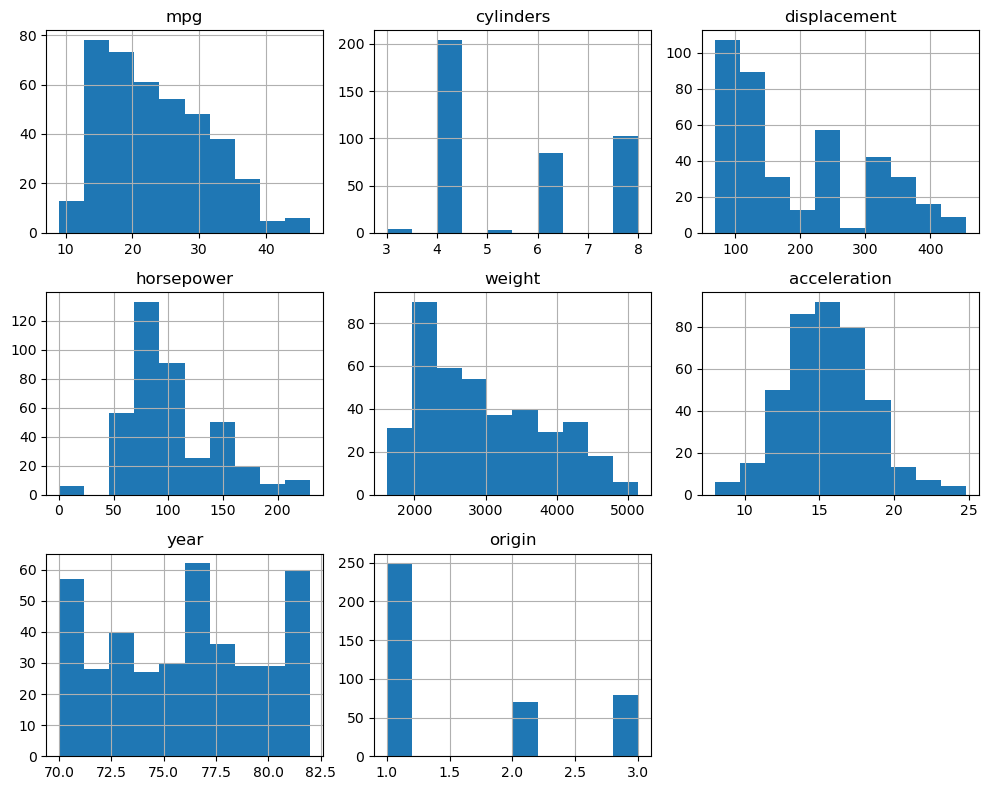

In [30]:
car_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [31]:
mpg_per_year = car_df.groupby('year')['mpg'].mean()

print(mpg_per_year)


year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64


In [32]:
# def calculate_mean(df, column1, column2):
#     mpg_per_year = car_df.groupby('year')['mpg'].mean()
#     return mpg_per_year

# calculate_mean(car_df,"year", "mpg")

In [33]:
#Got the means of mpg per year group "70-72", "73-75", "76-78", "79-82"
mean_70_72 = np.mean(car_df[car_df["year groups"] == "70-72"]["mpg"])
mean_73_75 = np.mean(car_df[car_df["year groups"] == "73-75"]["mpg"])
mean_76_78 = np.mean(car_df[car_df["year groups"] == "76-78"]["mpg"])
mean_79_82 = np.mean(car_df[car_df["year groups"] == "79-82"]["mpg"])

print(mean_70_72)

19.2


In [38]:
std_70_72 = np.std(car_df[car_df['year groups'] == '70-72']['mpg'])
std_73_75 = np.std(car_df[car_df["year groups"] == "73-75"]["mpg"])
std_76_78 = np.std(car_df[car_df["year groups"] == "76-78"]["mpg"])
std_79_82 = np.std(car_df[car_df["year groups"] == "79-82"]["mpg"])

5.90074770935106

In [52]:
#Created Dataframes
y_70_72_df = car_df[car_df["year groups"] == "70-72"]['mpg']
y_73_75_df = car_df[car_df["year groups"] == "73-75"]['mpg']
y_76_78_df = car_df[car_df["year groups"] == "76-78"]['mpg']
y_79_82_df= car_df[car_df["year groups"] == "79-82"]['mpg']

print(y_70_72_df)

0     18.0
1     15.0
2     18.0
3     16.0
4     17.0
      ... 
80    22.0
81    28.0
82    23.0
83    28.0
84    27.0
Name: mpg, Length: 85, dtype: float64


In [53]:
y_73_75_df.values

array([13., 14., 13., 14., 15., 12., 13., 13., 14., 13., 12., 13., 18.,
       16., 18., 18., 23., 26., 11., 12., 13., 12., 18., 20., 21., 22.,
       18., 19., 21., 26., 15., 16., 29., 24., 20., 19., 15., 24., 20.,
       11., 20., 21., 19., 15., 31., 26., 32., 25., 16., 16., 18., 16.,
       13., 14., 14., 14., 29., 26., 26., 31., 32., 28., 24., 26., 24.,
       26., 31., 19., 18., 15., 15., 16., 15., 16., 14., 17., 16., 15.,
       18., 21., 20., 13., 29., 23., 20., 23., 24., 25., 24., 18., 29.,
       19., 23., 23., 22., 25., 33.])

In [57]:
t_stat, p_value = stats.ttest_ind(y_70_72_df.values, y_79_82_df.values, equal_var=False)

print(t_stat, p_value)

-12.179004711591249 9.655853345310175e-26


In [71]:
a = car_df.groupby('year').mean()['mpg']

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_12165/1723141333.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = car_df.groupby('year').mean()['mpg']


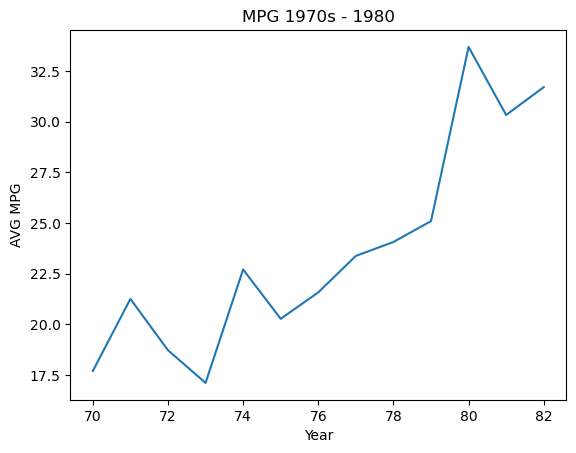

In [76]:
plt.plot(a.index, a.values)
plt.title('MPG 1970s - 1980')
plt.ylabel('AVG MPG')
plt.xlabel('Year')
plt.show()

In [67]:
list(car_df['year'].values)

[70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,


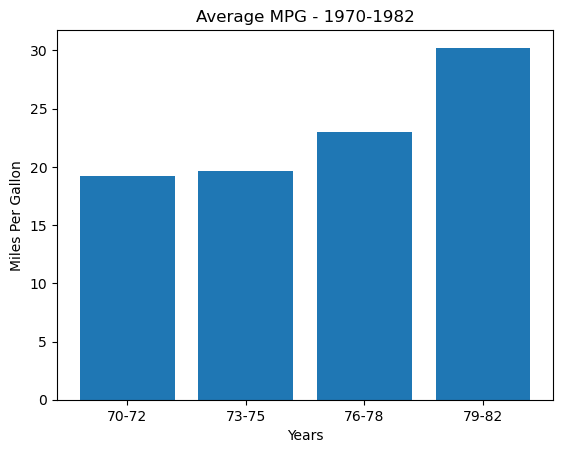

In [35]:
year_groups = ["70-72", "73-75", "76-78", "79-82"]

plt.bar(year_groups, [mean_70_72, mean_73_75, mean_76_78, mean_79_82])

plt.xlabel("Years")
plt.ylabel("Miles Per Gallon")
plt.title("Average MPG - 1970-1982")


plt.show()